# Chapter 9 - Mathematical Tools
수학용도구

<br></br>
## 1 Approximation (근사법 )
회귀법(regression), 보간법(interplation)을 활용하여 근사값을 계산

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# sin() 파동의 변화를 시각화
def f(x):
    return np.sin(x) + 0.5 * x

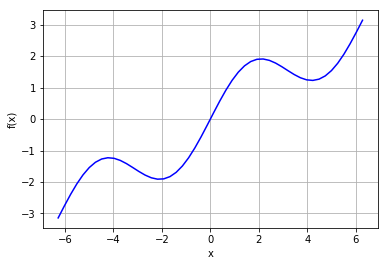

In [2]:
# 관심구간인 -2pi ~ 2pi 사이의 구간을 관찰
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x'); plt.ylabel('f(x)')

### 01 회귀법
regression

#### 1) 1차 다항식을 적용
회귀식 모델의 다양한 적용 1

In [3]:
# np.polyfit()
# x factor , y target 의 회귀식 추출
x_sample = [i for i in range(10)]
y_sample = [i for i in range(0,20,2)]
reg = np.polyfit(x_sample, y_sample, deg=1)  # deg = 1 : 회귀식 x의 차수를 지정 (1차원 함수)
                             # deg = 2 : 회귀식은 X^2, X^1 두개의 차수로 구성 (X는 2차원 함수)
reg  # array(weight , bias) 출력

array([  2.00000000e+00,   1.12346671e-15])

In [4]:
# np.polyval() : 회귀식 검증
np.polyval(reg, x)            # 추출 회귀식에 x를 대입한, 예측 Y값 출력

array([-12.56637061, -12.05345753, -11.54054444, -11.02763136,
       -10.51471827, -10.00180518,  -9.4888921 ,  -8.97597901,
        -8.46306592,  -7.95015284,  -7.43723975,  -6.92432667,
        -6.41141358,  -5.89850049,  -5.38558741,  -4.87267432,
        -4.35976123,  -3.84684815,  -3.33393506,  -2.82102197,
        -2.30810889,  -1.7951958 ,  -1.28228272,  -0.76936963,
        -0.25645654,   0.25645654,   0.76936963,   1.28228272,
         1.7951958 ,   2.30810889,   2.82102197,   3.33393506,
         3.84684815,   4.35976123,   4.87267432,   5.38558741,
         5.89850049,   6.41141358,   6.92432667,   7.43723975,
         7.95015284,   8.46306592,   8.97597901,   9.4888921 ,
        10.00180518,  10.51471827,  11.02763136,  11.54054444,
        12.05345753,  12.56637061])

In [5]:
# 단항 기저함수 Monomials as Basis Functions
# np.polyfit() - train(훈련)
# np.polyval() - test (검증)
reg = np.polyfit(x, f(x), deg=1) # 
ry = np.polyval(reg, x)

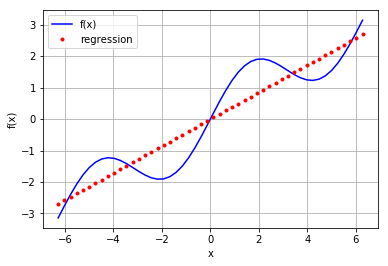

In [6]:
plt.plot(x, f(x), 'b', label='f(x)')        # sin() 그래프
plt.plot(x, ry,  'r.', label='regression')  # np.polyfit() 회귀식 그래프
plt.legend(loc=0)
plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

#### 2) 5차 다항식을 적용
회귀식 모델의 다양한 적용 2

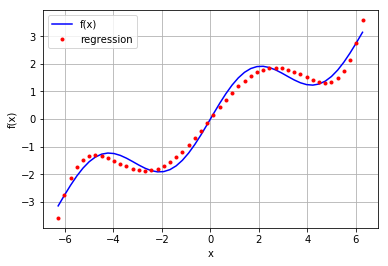

In [7]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0); plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

#### 3) 7차 다항식을 적용
회귀식 모델의 다양한 적용 3

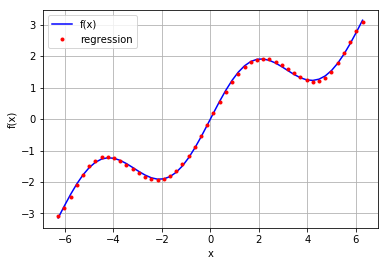

In [8]:
reg = np.polyfit(x, f(x), deg = 7)
ry = np.polyval(reg, x)

plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0); plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

In [9]:
# 7차 다항식을 정의한 결과 유하산 그래프가 출력
# 함수와 회귀식은 완전히 일치하지 않는다
np.allclose(f(x), ry)

False

In [10]:
# MSE(평균제곱오차) 로 Cost 계산 - 그 오차는 작다
np.sum((f(x) - ry) ** 2) / len(x)

0.0017769134759517593

### 02 개별 기저함수
Individual Basis Functions

In [11]:
# http://darkpgmr.tistory.com/56
# 최소자승법(Least Square Method)은 모델, 데이터, residual2의 
# 합 또는 평균을 최소화하도록 파라미터를 결정하는 방법.

# Residual은 어떤 데이터가 추정된 모델로부터 얼마나 떨어진 값인가를 
# 나타내는 용어로 통계학에서는 '잔차'라고 부른다고 한다

# 최소자승법을 계산하는 방법은 크게 
# 해석학적(analytic : 편미분 함수를 연립방정식으로 계산) 방법과 
# 대수적(algebraic : 선형대수로 계산) 방법이 있다

In [12]:
# 모델 : 가설함수
# 파라미터 : 모델의 weight, bias 조절 값

In [13]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1
matrix.shape

(4, 50)

#### 1) 최소 자승 최적화 문제를 풀이
고차원 다항식을 활용

np.linalg.lstsq(matrix.T, f(x))[0]

In [14]:
# 기저 함수에 대한 최적의 파라미터를 계산
reg = np.linalg.lstsq(matrix.T, f(x))[0]
reg

array([  1.13340410e-14,   5.62777448e-01,  -8.88178420e-16,
        -5.43553615e-03])

In [15]:
# 회귀식 결과를 적용 (np.dot(벡터 내적의 합))
ry = np.dot(reg, matrix)
ry.shape

(50,)

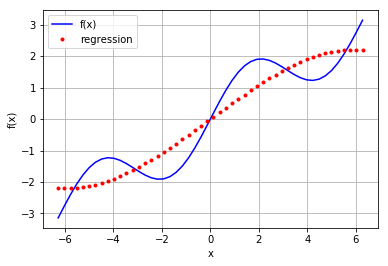

In [16]:
# Regression via least-squares function
plt.plot(x, f(x), 'b', label='f(x)')       # sin() 그래프
plt.plot(x, ry, 'r.', label='regression')  # np.dot() 회귀식 연산결과
plt.legend(loc=0); plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

#### 2) 기저함수에 sin() 함수를 적용
matrix[3, :] = np.sin(x)

In [17]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)

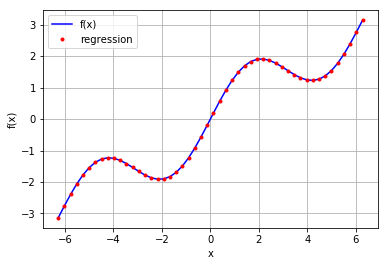

In [18]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

In [19]:
# 수치적 일치도 높아짐
np.allclose(f(x), ry)

True

In [20]:
np.sum((f(x) - ry) ** 2) / len(x)

7.2578284768244106e-31

In [21]:
reg

array([  9.26243218e-17,   5.00000000e-01,   0.00000000e+00,
         1.00000000e+00])

### 03 잡음이 포함된 경우
Noisy Data

In [22]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
# 독립변숙와 측정값에 잡음을 포함시킨다 
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

In [23]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

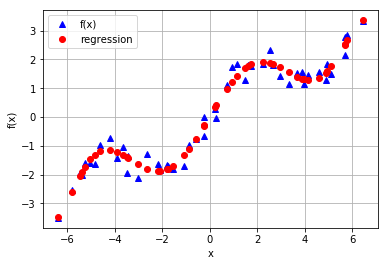

In [24]:
plt.plot(xn, yn, 'b^', label='f(x)')
plt.plot(xn, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

In [25]:
# 결론
# 회귀법을 통하면 일정한 잡음을 제거할 수 있다

### 04 정렬되지 않은 자료
Regression with unsorted data

In [26]:
# 데이터를 뒤섞으며 생성하기 
# xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
# yu = f(xu)

In [27]:
# 데이터를 생성 후 뒤섞기 (이해가 더 쉽다)
xu = np.linspace(-2 * np.pi, 2 * np.pi, 50)
np.random.shuffle(xu)
yu = f(xu)

In [28]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[-5.   -4.74  4.23 -2.18 -1.67  3.46  3.98 -1.92 -0.13  5.51]
[-1.54 -1.37  1.23 -1.91 -1.83  1.42  1.25 -1.9  -0.19  2.06]


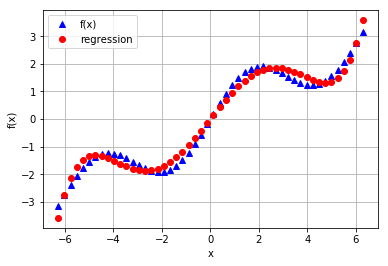

In [29]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

plt.plot(xu, yu, 'b^', label='f(x)')
plt.plot(xu, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

In [30]:
# 결론
# 잡음이 포함된 데이터와 동일하게, 자료형의 순서는 
# 회귀식 생성에 영향을 받지 않는다

### 05 다차원 자료
Multiple Dimensions

#### 1) np.meshgrid(x, y)
1차원 배열을 정방(square) 행렬로 선언

In [31]:
x = np.linspace(0, 10, 10)
y = np.linspace(0, 10, 10)

# 1차원 배열에서, 2차원 그리드를 생성한다
# 해당 배열을 정방(square) 행렬로 선언
X, Y = np.meshgrid(x, y)

array([[  0.        ,   1.11111111,   2.22222222,   3.33333333,
          4.44444444,   5.55555556,   6.66666667,   7.77777778,
          8.88888889,  10.        ],
       [  0.        ,   1.11111111,   2.22222222,   3.33333333,
          4.44444444,   5.55555556,   6.66666667,   7.77777778,
          8.88888889,  10.        ]])

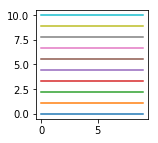

In [32]:
# np.meshgrid() : X 는 수평으로 나열
plt.subplots(1,1,figsize=(2,2))
plt.plot(X); X[:2]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.11111111,  1.11111111,  1.11111111,  1.11111111,  1.11111111,
         1.11111111,  1.11111111,  1.11111111,  1.11111111,  1.11111111],
       [ 2.22222222,  2.22222222,  2.22222222,  2.22222222,  2.22222222,
         2.22222222,  2.22222222,  2.22222222,  2.22222222,  2.22222222]])

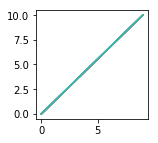

In [33]:
# np.meshgrid() : Y 는 축척
plt.subplots(1,1,figsize=(2,2))
plt.plot(Y); Y[:3]

#### 2) 모델의 적용
Function with two parameters

In [34]:
def fm(x, y):
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [35]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)

# 1차원 배열에서, 2차원 그리드를 생성한다
# 해당 배열을 정방(square) 행렬로 선언
X, Y = np.meshgrid(x, y)
print('X :', X.shape," Y :", Y.shape )

X : (20, 20)  Y : (20, 20)


In [36]:
# 다차원 함수를 적용
Z = fm(X, Y)

# 2차원 Matrix 를, 1차원 array로 이어 붙인다 (fully connected)
x = X.flatten()
y = Y.flatten()
print('x :', x.shape," y :", y.shape )

x : (400,)  y : (400,)


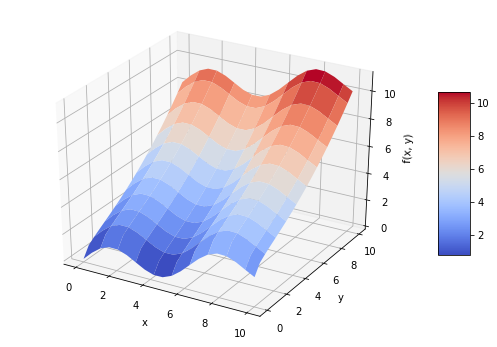

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
        linewidth=0.5, antialiased=True)
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [38]:
# 결과의 정제를 위한 기저함수 집합
# Higher dimension regression
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 0] = 1           # 0번필드 1로 채운다
matrix[:, 1] = x           # 1번필드 x 배열로 채운다
matrix[:, 2] = y           # 2번필드 y 배열로 채운다
matrix[:, 3] = x ** 2      # 3번필드 x 제곱으로 채운다
matrix[:, 4] = y ** 2      # 4번필드 y 제곱으로 채운다
matrix[:, 5] = np.sin(x)   # 5번필드 x sin() 값으로 채운다 
matrix[:, 6] = np.sqrt(y)  # 6번필드 y 제곱근으로 채운다

print(matrix.shape); matrix[:4]

(400, 7)


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.52631579,  0.        ,  0.27700831,  0.        ,
         0.50235115,  0.        ],
       [ 1.        ,  1.05263158,  0.        ,  1.10803324,  0.        ,
         0.86872962,  0.        ],
       [ 1.        ,  1.57894737,  0.        ,  2.49307479,  0.        ,
         0.99996678,  0.        ]])

In [39]:
# 최소 자승 회귀계산
import statsmodels.api as sm
model = sm.OLS(fm(x, y), matrix).fit()

# r-squared : R^2 결정계수
# 회귀식에서 개별데이터의 MSE 오차 거리거리로 0 ~ 1 사이의 값을 갖는다
# 0 : 회귀식의 정확도가 낮다
# 1 : 회귀식의 정확도가 높다
model.rsquared 

1.0

#### 결정계수
http://math7.tistory.com/123

<img src ="http://cfile3.uf.tistory.com/image/2421B33654D318480A6D0D" align='left' width='600'>

In [40]:
# model 로 정의한 데이터에 대한 요약정보를 출력
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.336e+30
Date:                Tue, 05 Sep 2017   Prob (F-statistic):               0.00
Time:                        20:10:04   Log-Likelihood:                 12211.
No. Observations:                 400   AIC:                        -2.441e+04
Df Residuals:                     393   BIC:                        -2.438e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.845e-15   3.45e-15      0.825      0.410   -3.93e-15    9.62e-15
x1             0.2500   8.96e-16   2.79e+14      0.000       0.250       0.250
x2          7.772e-16   2.92e-15      0.266      0.790   -4.96e-15    6.52e-15
x3         -3.261e-16   8.61e-17     -3.790      0.000   -4.95e-16   -1.57e-16
x4             0.0500   1.52e-16    3.3e+14      0.000       0.050       0.050
x5             1.0000   1.07e-15   9.33e+14      0.000       1.000       1.000
x6             1.0000   5.72e-15   1.75e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   0.274
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                2.570
Skew:                          -0.031   Prob(JB):                        0.277
Kurtosis:                       2.612   Cond. No.                         587.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# model.params : 최적회귀계수를 출력
# matrix.shape (400, 7) 로 전체 7개 파라미터 출력 
a = model.params; a

array([  2.84494650e-15,   2.50000000e-01,   7.77156117e-16,
        -3.26128013e-16,   5.00000000e-02,   1.00000000e+00,
         1.00000000e+00])

In [42]:
def reg_func(a, p):
    x, y = p
    f0 = a[0] * 1
    f1 = a[1] * x
    f2 = a[2] * y
    f3 = a[3] * x ** 2
    f4 = a[4] * y ** 2
    f5 = a[5] * np.sin(x)
    f6 = a[6] * np.sqrt(y)
    return (f6 + f5 + f4 + f3 + f2 + f1 + f0)

In [43]:
RZ = reg_func(a, (X, Y))

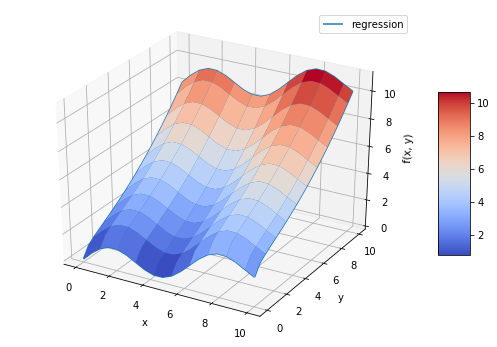

In [44]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
            cmap=mpl.cm.coolwarm, linewidth=0.5,
            antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')
ax.set_xlabel('x');       ax.set_ylabel('y')
ax.set_zlabel('f(x, y)'); ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)

<br></br>
## 2 보간법
보간법(interplation) : 두 함수 사이의 값들로 새로운 규칙을 생성하는 방법으로

'독립변수'를 관찰하기 힘들떄, '종속변수를 통한 추정'의 용도로 쓰인다

다차원에는 적용하기가 힘들다. X축 방향으로 정렬된 자료를 사용하는 점만 제외하면, 나머지는 회귀법과 동일

### 01 2개 모델 사이를  1차원 선형분리 모델을 적용한 보간법
Function with two parameters

In [45]:
import scipy.interpolate as spi
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

def f(x):
    return np.sin(x) + 0.5 * x

In [46]:
ipo = spi.splrep(x, f(x), k=1)  # polyfit() 대신 적용 - k : 스플릿라인 함수의 차수 (y = ax + b)
iy = spi.splev(x, ipo)          # polyvalue() 대신 적용 - 파라미터를 적용한 test결과를 출력

ipo[1]

array([-3.14159265, -2.37979327, -1.75196847, -1.35619449, -1.2283697 ,
       -1.33259571, -1.57079633, -1.80899694, -1.91322295, -1.78539816,
       -1.38962418, -0.76179939,  0.        ,  0.76179939,  1.38962418,
        1.78539816,  1.91322295,  1.80899694,  1.57079633,  1.33259571,
        1.2283697 ,  1.35619449,  1.75196847,  2.37979327,  3.14159265,
        0.        ,  0.        ])

In [47]:
# 연산으로 동일성 확인
np.allclose(f(x), iy)

True

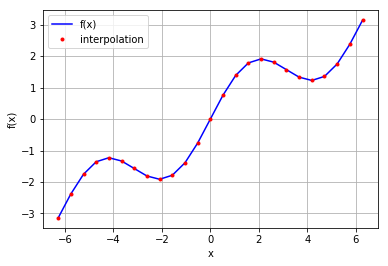

In [48]:
# 두 관측점 사이를 선형으로 보간 (관측점에선 연속 미분은 아니다)
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

### 02 spline 보간법
Using spline

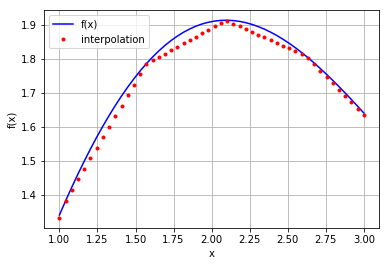

In [49]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0); plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

### 03 3차 큐빅 spline 활용 보간법
Using 3dim Spline

In [50]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

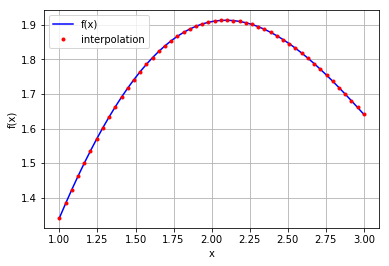

In [51]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_ipo_3
# title: Example plot (detail) with cubic splines interpolation
# size: 60

In [52]:
# 수치적으로는 보간법이 완벽히 적용되지 않음
np.allclose(f(xd), iyd)

False

In [53]:
# 오차승수값은 아주 작다
np.sum((f(xd) - iyd) ** 2) / len(xd)

1.1349319851436252e-08

<br></br>
## 3 최적화 Convex Optimization
Function to minimize with two parameters

인수교정 및 대리인 효용함수 최적화에 적용

### 01 Introduction
fig.gca(projection='3d')

In [54]:
def fm(x, y):
    return (np.sin(x) + 0.05 * x ** 2
          + np.sin(y) + 0.05 * y ** 2)

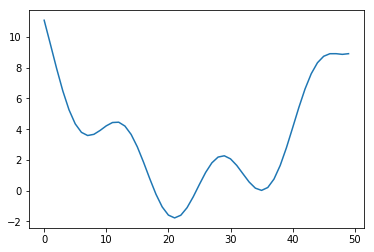

In [55]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
plt.plot(fm(x,y)) # 2차원 그래프로 시각화 결과

In [56]:
# 다차원 데이터로 변환
X, Y = np.meshgrid(x, y)
Z = fm(X, Y)

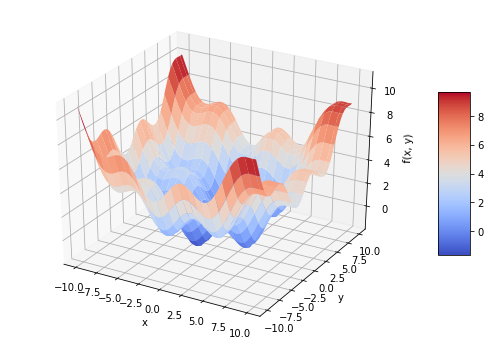

In [57]:
# 시각화
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
        linewidth=0.5, antialiased=True)
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

### 02 전역 최적화
scipy.optimize() 

spo.brute()

Global Optimization : 전역 최소화 방법과, 국소 최소화 방법을 구현

In [58]:
def fo(p):
    x, y = p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f %8.4f %8.4f' % (x, y, z))
    return z

In [59]:
# 최적값을 찾기위한 Train을 실시한다

import scipy.optimize as spo
output = True
# (-10, 10.1, 5) : -10 ~ 10 사이값을 -10, -5, 0, 5, 10 순차적 출력한다
spo.brute( fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish = None )

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([ 0.,  0.])

In [60]:
output = False # 계산 과정을 출력하지 않는다
opt1 = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
opt1

array([-1.4, -1.4])

In [61]:
x_1, y_1 = opt1
fm(x_1, y_1)

-1.7748994599769203

### 03 국소 최적화 Local Optimization
위의 전역 최적화 결과 (opt1)를 기반으로 국소 최적화를 진행

In [62]:
output = True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
opt2

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757


array([-1.42702972, -1.42876755])

In [63]:
x_1, y_1 = opt2
fm(x_1, y_1)

-1.7757246992239009

In [64]:
output = False
spo.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([ 4.2710728 ,  4.27106945])

### 04 제약조건이 있는 최적화
부등식의 제약조건 내 최적화 Constrained Optimization

In [65]:
# 최소화 대상 함수
from math import sqrt
def Eu(p):
    s, b = p
    return -(0.5 * sqrt(s * 15 + b * 5) + 0.5 * sqrt(s * 5 + b * 12))

In [66]:
# 제약조건
cons = ({'type': 'ineq', 'fun': lambda p:  100 - p[0] * 10 - p[1] * 10})
# 예산조건<br></br>
bnds = ((0, 1000), (0, 1000))  # 충분히 큰 범위값을 지정한다
# 최적화를 위한 초기 인수값 추가 ([5,5])
result = spo.minimize(Eu, [5, 5], method='SLSQP',
                      bounds = bnds, constraints = cons)
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 8.02547122,  1.97452878])

In [67]:
# 최적 인수값만 출력 
# ( result 객체내 dict 으로 선택적 출력 )
result['x']

array([ 8.02547122,  1.97452878])

In [68]:
# 최적 함수 값 (단 부호는 반대)
result['fun']

-9.700883611487832

In [69]:
# 최적 주식수와 가격 벡터의 내적을 연산
np.dot(result['x'], [10,10])

99.999999999999986

<br></br>
## 4 정적분 Integration
위험중립 결과값을, 할인한 기댓값으로 연산시 활용

### 01 정적분 계산 및 Graph 그리기
Polygon( [X, Y 좌표 list 객체], facecolor='0.7', edgecolor='0.5')

In [70]:
import scipy.integrate as sci

def f(x):
    return np.sin(x) + 0.5 * x

In [71]:
a = 0.5  # 정적분 구간의 좌극한
b = 9.5  # 정적분 구간의 우극한
x = np.linspace(0, 10)
y = f(x)
y

array([ 0.        ,  0.30470875,  0.60100578,  0.88082849,  1.13679805,
        1.36252565,  1.55287768,  1.70418879,  1.81441401,  1.88321366,
        1.91196739,  1.903717  ,  1.86304012,  1.79586023,  1.70920083,
        1.61089392,  1.50925492,  1.41273756,  1.32958298,  1.26747772,
        1.23323464,  1.2325102 ,  1.26956967,  1.34711011,  1.46614839,
        1.62597904,  1.82420349,  2.05682965,  2.31843757,  2.60240443,
        2.9011794 ,  3.20659704,  3.51021619,  3.80367037,  4.07901495,
        4.32905699,  4.54765369,  4.7299674 ,  4.87266642,  4.9740632 ,
        5.0341845 ,  5.05477017,  5.03920101,  4.99235842,  4.92042179,
        4.83061205,  4.73089195,  4.62963557,  4.53528075,  4.45597889])

In [72]:
# 정적분 구간 계산하기
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
verts[:6]

[(0.5, 0),
 (0.5, 0.72942553860420301),
 (0.68367346938775508, 0.97348189928683826),
 (0.86734693877551017, 1.196288954158784),
 (1.0510204081632653, 1.3934407035518863),
 (1.2346938775510203, 1.5613942232434239)]

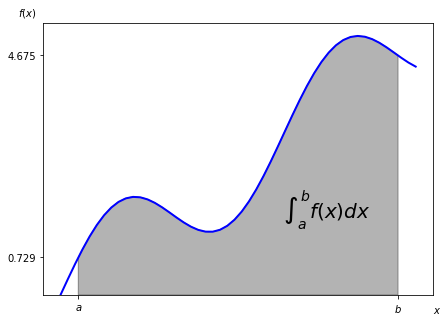

In [73]:
# Example function with integral area
from matplotlib.patches import Polygon
fig, ax = plt.subplots(figsize = (7, 5))
plt.plot(x, y, 'b', linewidth = 2)
plt.ylim(ymin = 0)

# 함수내 정적분 구간 시각화
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

# 그래프의 라벨을 지정한다
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",  # 적분 구간에 글자표시
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')         # x 축의 끝에  x 표시
plt.figtext(0.075, 0.9, '$f(x)$')      # y 축의 끝에  f(x) 표시
ax.set_xticks((a, b))                  # x축 a, b 를 marked
ax.set_yticks([f(a), f(b)])            # y축 유효구간 marked
ax.set_xticklabels(('$a$', '$b$'))

### 02 수치적분
Numerical Integration

In [74]:
# sci.fixed_quad() : 가우스 구적법으로 정적분
import scipy.integrate as sci
sci.fixed_quad(f, a, b)[0]

24.366995967084602

In [75]:
# sci.quad() : 적응 구적법으로 정적분
sci.quad(f, a, b)[0]

24.374754718086752

In [76]:
# sci.romberg() : 롬베르크 적분법으로 정적분
sci.romberg(f, a, b)

24.374754718086713

In [77]:
# sci.trapz() : array 객체로 사다리꼴 정적분
xi = np.linspace(0.5, 9.5, 25)
sci.trapz(f(xi), xi)

24.352733271544516

In [78]:
# sci.simps() : array 객체로 심승 정적분
sci.simps(f(xi), xi)

24.374964184550748

### 03 시뮬레이션을 사용한 적분
Integration by Simulation

In [79]:
# x 값이 증가할수록, 정적분 값으로 수렴한다
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a
    print(np.sum(f(x)) / len(x) * (b - a))

24.8047622793
26.5229188983
26.2655475192
26.0277033994
24.9995418144
23.8818101416
23.5279122748
23.507857659
23.6723674607
23.6794104161
24.4244017079
24.2390053468
24.115396925
24.4241919876
23.9249330805
24.1948421203
24.1173483782
24.1006909297
23.7690510985


<br></br>
## 5 심볼릭 연산
Symbolic Computation

pip install sympy

### 01 심볼릭 연산의 기초
수식을 보기좋게 화면에 출력

In [80]:
# 심볼릭 객체를 생성
import sympy as sy

x = sy.Symbol('x')
y = sy.Symbol('y')
type(x)

sympy.core.symbol.Symbol

In [81]:
# x 제곱근을 정의함으로써, 수학식의 일부와 동일하게 적용
sy.sqrt(x)

sqrt(x)

In [82]:
# symblic 이 포함된 수식
3 + sy.sqrt(x) - 4 ** 2

sqrt(x) - 13

In [83]:
# symblic 이 포함된 수식 2 
f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2
sy.simplify(f)

1.5*x**2 + 4.5

In [84]:
# symblic 이 포함된 수식 3 : 제곱근은 보기좋게 표시
sy.init_printing(pretty_print=False, use_unicode=False)
print(sy.pretty(f))
sy.pretty(f)

     2      
1.5*x  + 4.5


'     2      \n1.5*x  + 4.5'

In [85]:
print(sy.pretty(sy.sqrt(x) + 0.5))
sy.pretty(sy.sqrt(x) + 0.5)

  ___      
\/ x  + 0.5


'  ___      \n\\/ x  + 0.5'

In [86]:
pi_str = str(sy.N(sy.pi, 40000))
pi_str[:40]

'3.14159265358979323846264338327950288419'

In [87]:
pi_str[-40:]

'3907469361988150781468526213325247383765'

In [88]:
pi_str.find('652272')

3987

### 02 방정식
해당 수식을 연산가능 Equations

In [89]:
# 해당 수식의 연산결과 출력
print(sy.solve(x ** 2 - 1))                 # X^2 - 1 = 0 의 수식을 풀이
print(sy.solve(x ** 2 - 1 - 3))             # X^2 - 1 - 3 = 0 의 수식을 풀이
print(sy.solve(x ** 3 + 0.5 * x ** 2 - 1))  # X^3 + 0.5X^2 -1 = 0 의 수식을 풀이
sy.solve(x ** 2 + y ** 2)                   # X^2 + Y^2 = 0 복소수 연산

[-1, 1]
[-2, 2]
[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]


[{x: -I*y}, {x: I*y}]

### 03 적분
Integration

In [90]:
# x , y 를 제외한 심볼릭 객체 (a, b)를 정의
a, b = sy.symbols('a b')

In [91]:
# 적분 수식을 출력
print(sy.pretty(sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b))))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [92]:
# 부정적분 함수를 출력
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)
print('f(x):  \n', sy.pretty(int_func))

Fb = int_func.subs(x, 9.5).evalf()
Fa = int_func.subs(x, 0.5).evalf()
Fb - Fa   # 정확한 적분값 출력

f(x):  
       2         
0.25*x  - cos(x)


24.3747547180867

In [93]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))
print(sy.pretty(int_func_limits))
# 심볼릭 함수에 a, b 수치를 대입 : ( a, b  {dict} 객체의 형식으로 입력 )
int_func_limits.subs({a : 0.5, b : 9.5}).evalf()

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


24.3747547180868

In [94]:
# 적분 구간을 인수로 대입
# sy.integrate( 수식, (매개변수, 구간1, 구간2))
sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))

24.3747547180867

### 04 미분
부정적분 함수를 다시 미분시, 본래의 함수로 되돌아간다

In [95]:
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)
int_func.diff()

0.5*x + sin(x)

In [96]:
# sy.diff( 미분대상 함수, dy/ dx 편미분 변수)
f = (sy.sin(x) + 0.05 * x ** 2
   + sy.cos(y) + 0.05 * y ** 2)

del_x = sy.diff(f, x)
del_y = sy.diff(f, y)
print('d/dx :', del_x, '\nd/dy :', del_y)

d/dx : 0.1*x + cos(x) 
d/dy : 0.1*y - sin(y)


In [97]:
# d/dx 미분함수에 , x = -1.5 대입
xo = sy.nsolve(del_x, -1.5); print(xo)
yo = sy.nsolve(del_y, -1.5); print(yo)

# 전역 최소점 
f.subs({x : xo, y : yo}).evalf() 

-1.42755177876459
7.06817435809582


2.31748761946137

In [98]:
xo = sy.nsolve(del_x, 1.5); print(xo)
yo = sy.nsolve(del_y, 1.5); print(yo)
# 국소 최소점 연산
f.subs({x : xo, y : yo}).evalf()

1.74632928225285
7.06817435809582


4.34246735131328

In [99]:
# 결론
# 함수근사 : 이자율 보간 및 옵션가치 계산을 위한 몬테카를로 분석의 금융모델에 주요
# 최적화기법 : 
# 수치적분 : 
# SymPy 로 수식연산을 확인 및 적용에도 용이하다